# Twitter Data EDA

The data is collected using the following key words

- inflation
- fuelprice
- fuelpricehike
-  fuelprices
- fuelshortage
- foodprice
-  oilprice
- oilprices
- cookingoilprice
- unemployment
- unemploymentrate
- economiccrisis
- economichardship

---

* our goal is to Explore the data for two machine learning tasks
1. Topic modeling
2. Sentiment Analysis

## Handle imports

In [1]:
# extrenal modules
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import os
import sys
import json
from collections import Counter
cwd = os.getcwd()
parent = cwd.replace('/notebooks', '')
sys.path.insert(0, parent) 
# custom modules
from clean_tweets_dataframe import CleanTweets
from extract_dataframe import read_json, TweetDfExtractor
from utils import DataLoader
from tweets_preprocess import SADataPreparation

rcParams['figure.figsize'] = (12, 7)
%matplotlib inline

## Data Acquisition

We already have a data transformation module (Data Consistency module) `extract_dataframe`
That will be used to Transform the JSON data into a pandas dataframe.
If this step is already run, it would simply read a CSV that it cached 
on the previous run.

In [2]:
filename = 'processed_tweet_data.csv'
loader = DataLoader('../', filename)
tweet_df = loader.read_csv()

* As we can see, there are lots of missing values and columns with the wrong datatypes. We have the Clean_Tweets class to handle this for us. 

In [3]:
tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,Twitter for Android,RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,de,0,355.0,McMc74078966,3,12,NaN,[],['nikitheblogger'],NaN
1,Fri Apr 22 22:19:16 +0000 2022,Twitter for Android,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,de,0,505.0,McMc74078966,3,12,NaN,[],['sagt_mit'],NaN
2,Fri Apr 22 22:17:28 +0000 2022,Twitter for Android,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,de,0,4.0,McMc74078966,3,12,NaN,[],"['Kryptonoun', 'WRi007']",NaN
3,Fri Apr 22 22:17:20 +0000 2022,Twitter for Android,RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,de,0,332.0,McMc74078966,3,12,NaN,"['Deutschen', 'Spritpreisen', 'inflation', 'Ab...",['WRi007'],NaN
4,Fri Apr 22 22:13:15 +0000 2022,Twitter for Android,RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,de,0,386.0,McMc74078966,3,12,NaN,[],['RolandTichy'],NaN


In [4]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24637 entries, 0 to 24636
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          24637 non-null  object 
 1   source              24633 non-null  object 
 2   original_text       24633 non-null  object 
 3   polarity            24625 non-null  object 
 4   subjectivity        24625 non-null  float64
 5   lang                24625 non-null  object 
 6   favorite_count      24625 non-null  object 
 7   retweet_count       24625 non-null  float64
 8   original_author     24625 non-null  object 
 9   followers_count     24618 non-null  object 
 10  friends_count       24625 non-null  object 
 11  possibly_sensitive  9982 non-null   object 
 12  hashtags            24624 non-null  object 
 13  user_mentions       24617 non-null  object 
 14  place               15724 non-null  object 
dtypes: float64(2), object(13)
memory usage: 2.8+ MB


### Missing entries

- Count total missing value
- See which columns have missing values
- Plot the number of missing values in columns

In [5]:
missing_count = tweet_df.isnull().sum()
# cols_with_missing = tweet_df.columns[tweet_df.isnull().any()]

print(f"Missing value(s) count: \n{missing_count}")
# print(f"Columns having missing value(s): {cols_with_missing}")

Missing value(s) count: 
created_at                0
source                    4
original_text             4
polarity                 12
subjectivity             12
lang                     12
favorite_count           12
retweet_count            12
original_author          12
followers_count          19
friends_count            12
possibly_sensitive    14655
hashtags                 13
user_mentions            20
place                  8913
dtype: int64


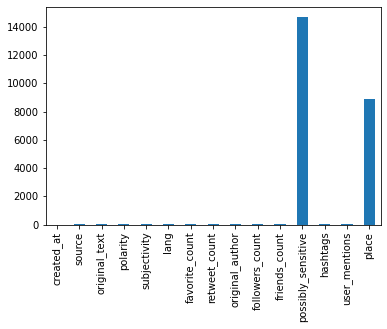

In [6]:
fig = missing_count.plot(kind='bar', fontsize=10).get_figure()
fig.savefig("missing_values_bar_chart.png")

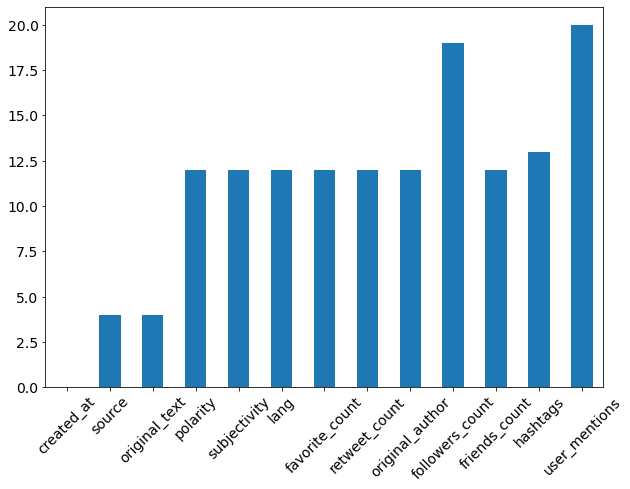

In [7]:
copy_missing_count = missing_count.copy()
copy_missing_count= copy_missing_count.drop(labels=['place', 'possibly_sensitive'])
fig = copy_missing_count.plot(kind='bar', fontsize=14, figsize=(10, 7), rot=45).get_figure()
fig.savefig("missing_values_bar_chart_with_drop.png")

In [8]:
cleaner = CleanTweets()
cleaned_df = cleaner.run_pipeline(tweet_df)
cleaned_df.info()

Automation in Action...!!!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10664 entries, 0 to 10663
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          10664 non-null  datetime64[ns, UTC]
 1   source              10664 non-null  object             
 2   clean_text          10664 non-null  object             
 3   polarity            10664 non-null  float64            
 4   subjectivity        10664 non-null  float64            
 5   lang                10664 non-null  object             
 6   favorite_count      10664 non-null  int64              
 7   retweet_count       10664 non-null  float64            
 8   original_author     10664 non-null  object             
 9   followers_count     10664 non-null  int64              
 10  friends_count       10664 non-null  int64              
 11  possibly_sensitive  10664 non-null  object             
 12  hasht

In [9]:
cleaned_df.head()

,created_at,source,clean_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-04-22 22:32:03+00:00,twitter for iphone,mickey bad move signed bill strips disney self...,-0.037500,0.533333,en,1,0.0,mercuryreports,9254,9422,False,[],['govrondesantis'],all over america
1,2022-04-22 22:16:55+00:00,twitter for iphone,elections consequences biden historic mishandl...,-0.066667,0.033333,en,1,0.0,mercuryreports,9254,9422,False,[],[],all over america
2,2022-04-22 07:15:28+00:00,twitter for iphone,coincidence food processing facilities burned ...,-0.077778,0.177778,en,4,1.0,mercuryreports,9254,9422,False,[],[],all over america
3,2022-04-22 07:11:18+00:00,twitter for iphone,food processing plants destroyed small plane c...,-0.100000,0.450000,en,3,2.0,mercuryreports,9254,9422,False,[],[],all over america
4,2022-04-22 07:07:13+00:00,twitter for iphone,democrats make evil big corporations pay fair ...,0.000000,0.666667,en,0,5465.0,mercuryreports,9254,9422,False,[],['catturd2'],all over america


In [10]:
pprocessor = SADataPreparation()
labled_df = pprocessor.preprocess_data(cleaned_df)
labled_df.columns

Pre-Processing the Tweets


Index(['created_at', 'source', 'clean_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place', 'score'],
      dtype='object')

As we can see above we hace a new column with the lables named score

In [11]:
labled_df[['clean_text', 'score']].tail()

,clean_text,score
10659,pil filed supreme court seeking nation wide ba...,neutral
10660,hello twitter suspended colleague account rece...,neutral
10661,best wishes amp heartfelt congratulations ppcc...,positive
10662,thank ji beautiful message communal harmony sh...,positive
10663,rapes murders bribery became new normal rule h...,positive


# Positive Vs Negative Sentiments

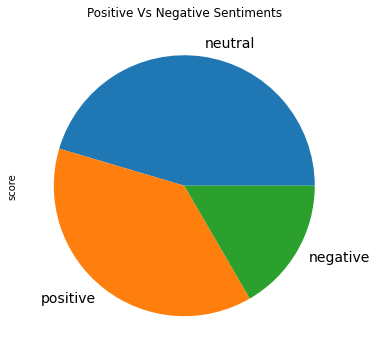

In [12]:
fig = labled_df['score'].value_counts().plot.pie(figsize=(6, 6), fontsize=14, title="Positive Vs Negative Sentiments").get_figure()
fig.savefig("pos_vs_neg.png")

In [13]:
cleaned_df.sort_values('created_at', ascending=True, inplace=True, ignore_index=True)
cleaned_df.loc[0, 'created_at'], cleaned_df.loc[len(cleaned_df)-1, 'created_at']

(Timestamp('2021-01-07 04:30:23+0000', tz='UTC'),
 Timestamp('2022-04-22 23:07:15+0000', tz='UTC'))

The timeline for the data we have is between 07-Jan-2021 upto 22-Apr-2022

# Common hashtags

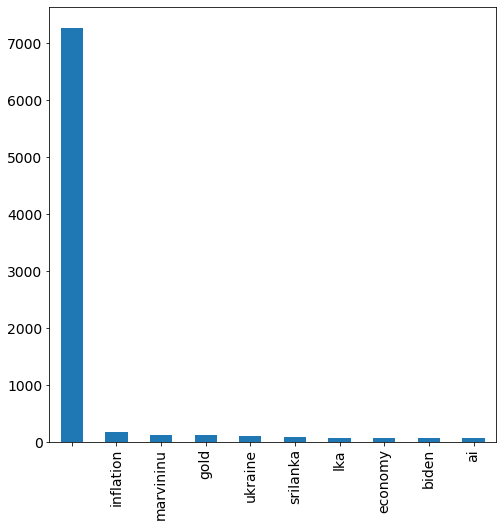

In [21]:
hashtags = cleaned_df['hashtags']#.map(np.array).values
all_hashtags = []
for hashtag in hashtags:
    hashtag = hashtag.strip("][").split(",")
    all_hashtags += hashtag

all_hashtags = list(map(lambda s: s.replace('\'', '').strip("'").strip(), all_hashtags)) 
from collections import Counter
hashtags_count = {**Counter(all_hashtags)}
# There is a blank entry with 2342 counts. I will remove that
hashtags_count = {key:val for key, val in hashtags_count.items() if val != 2342}
hashtags_count = pd.Series(hashtags_count)
# hashtags_count.head()
fig = hashtags_count.nlargest(10).plot.bar(figsize=(8, 8), fontsize=14).get_figure()
fig.savefig("common_hashtags.png")
# hashtags_count.nlargest()
# hashtags_count.shape

# Users Analysis

Here we will see, user specific details like:

* The total number of users in the dataset
* The number of tweets per users
* Users with the most liked, shared tweets
* The sentiment of the tweets with the most interactions (likes and retweets)

The main take away from this section is to see if tweets with posetive or negative sentiments are getting more interactions

In [22]:
users_count = cleaned_df['original_author'].value_counts()
print(len(users_count), "users")
print("Number of posts per user")
users_count.nlargest(5)

294 users
Number of posts per user


birchgold          50
lineappofficial    50
thuvion            50
sbl_uel            50
rewardstrategy     50
Name: original_author, dtype: int64

Now, for the part about interactions with tweets

<AxesSubplot:ylabel='Frequency'>

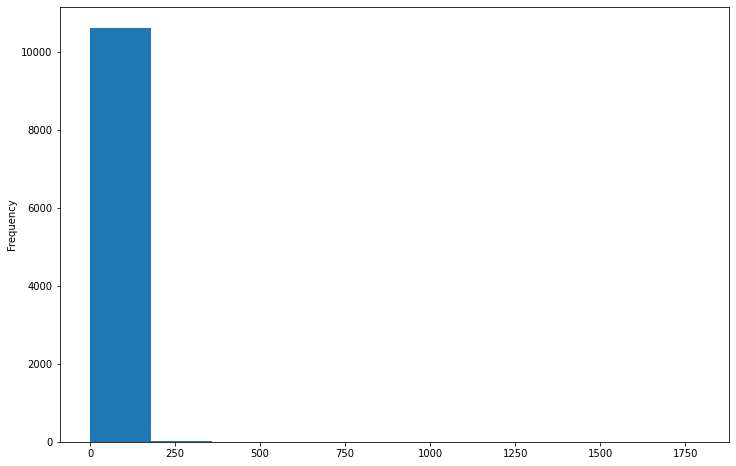

In [23]:
cleaned_df['favorite_count'].plot.hist(figsize=(12, 8))

***There are lot's of tweets withe 0 to 200 likes, which is why our plot is not showing the rest. Let's take only the tweets with likes>200***

<AxesSubplot:ylabel='Frequency'>

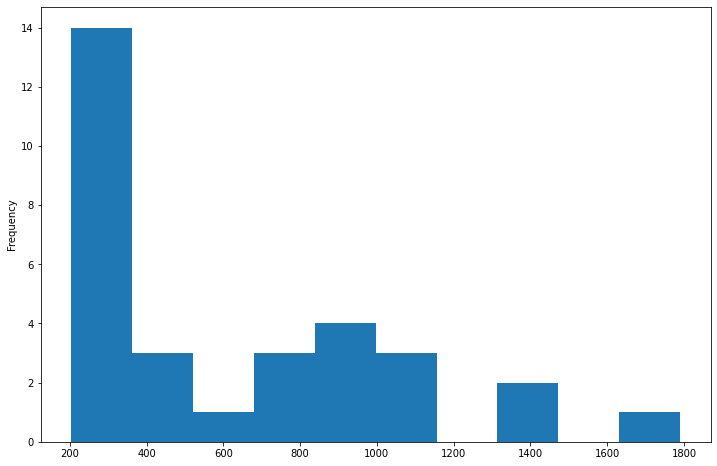

In [24]:
hot_tweets = cleaned_df[cleaned_df['favorite_count']>200]
hot_tweets['favorite_count'].plot.hist(figsize=(12, 8))

In [19]:
# Histogram showing the trend in the number of likes (favourites)


### Tweet Sources 

<AxesSubplot:>

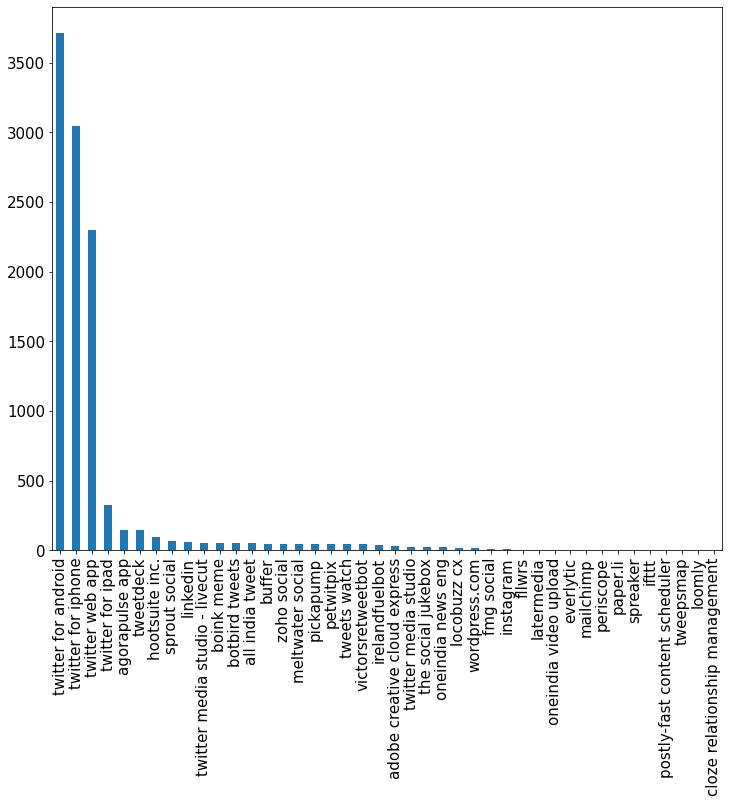

In [25]:
cleaned_df['source'].value_counts().plot(kind='bar', figsize=(12, 10), fontsize=15)

<AxesSubplot:>

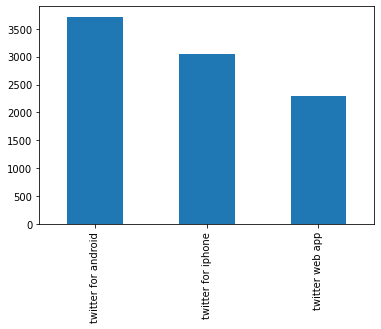

In [26]:
sources_df = labled_df[labled_df['source'].isin(["twitter web app", "twitter for android", "twitter for iphone"])]
# web_tweets = sources_df[sources_df['source'] == "Twitter Web App"]
# iphone_tweets = sources_df[sources_df['source'] == "Twitter for iPhone"]
# android_tweets = sources_df[sources_df['source'] == "Twitter for Android"]
sources_df['source'].value_counts().plot.bar()

<AxesSubplot:ylabel='score'>

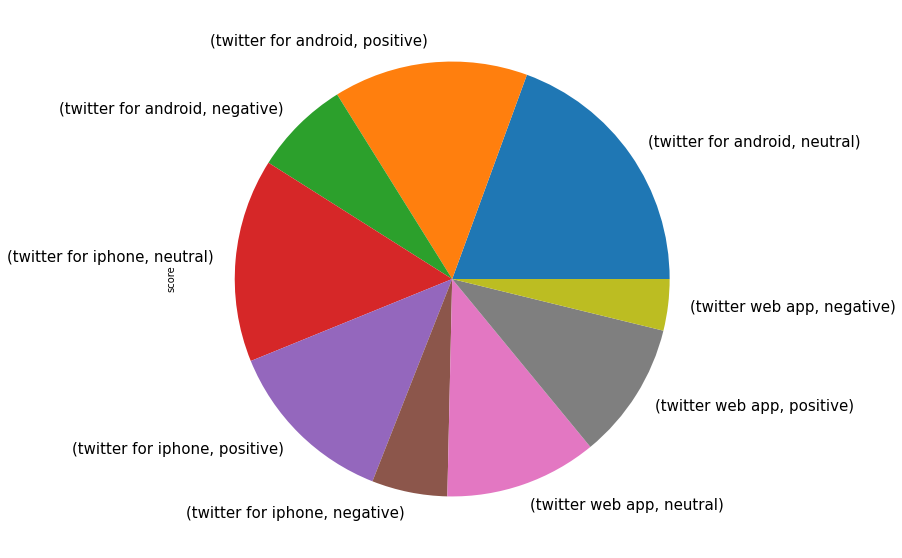

In [27]:
sources_df.groupby('source')['score'].value_counts().plot.pie(figsize=(12, 10), fontsize=15)

This shows that there are more  positive tweets than negative ones from all sources

<AxesSubplot:title={'center':'Common tweet sources polarity'}, xlabel='source,score'>

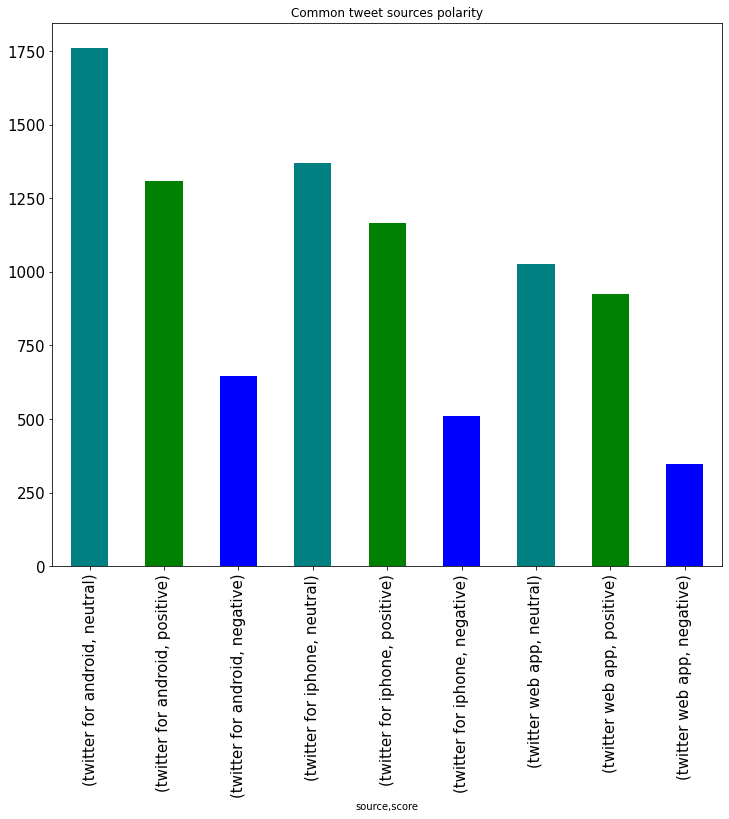

In [35]:
sources_df.groupby('source')['score'].value_counts().plot.bar(color=['teal', 'green', 'blue'],
                                                             figsize=(12, 10), 
                                                             fontsize=15,
                                                             title="Common tweet sources polarity")